<a href="https://colab.research.google.com/github/smit977/data-analysis/blob/main/sentimental_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Description :-- This is a sentiment analysis program that parses the tweets fetched from Twitter Python

In [2]:

#for simplify text or extract sentence and process for use of nltk
from textblob import TextBlob

#for visualize common word in txt 
from wordcloud import WordCloud

import pandas as pd
import numpy as np 
import re 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
#Loading amazon review data set
df=pd.read_csv("/content/drive/MyDrive/Colab/amazonreviews.csv")


In [4]:
df=df.drop(['label'],axis=1)

In [5]:
#create a function to clean review
def cleanText(text):
  text=re.sub(r'#','',text)    #removing '#' from text
  text=re.sub(r'https?:\/\/\S+','',text)  #removing hyperlink
  return text

#Clear the reviews
df['review']=df['review'].apply(cleanText)


In [6]:
#for removing space
for i,rv in df.itertuples():
  if type(rv)==str:
    if rv.isspace():
      df.drop([i],axis=0,inplace=True)


In [7]:
#create a  function to get subjectivity
def subjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#create a function to get polarity
def polarity(text):
  return TextBlob(text).sentiment.polarity

#create a new columns
df['subjectivity']=df['review'].apply(subjectivity)
df['polarity']=df['review'].apply(polarity)

#new dataframe
df.head(20)

,review,subjectivity,polarity
0,Stuning even for the non-gamer: This sound tra...,0.550000,-0.021875
1,The best soundtrack ever to anything.: I'm rea...,0.517460,0.261111
2,Amazing!: This soundtrack is my favorite music...,0.545988,0.274691
3,Excellent Soundtrack: I truly like this soundt...,0.463636,0.272727
4,"Remember, Pull Your Jaw Off The Floor After He...",0.520317,0.324802
5,an absolute masterpiece: I am quite sure any o...,0.490098,0.296599
6,"Buyer beware: This is a self-published book, a...",0.662963,0.042708
7,Glorious story: I loved Whisper of the wicked ...,0.710000,0.503333
8,A FIVE STAR BOOK: I just finished reading Whis...,0.635714,0.075000
9,Whispers of the Wicked Saints: This was a easy...,0.611667,0.216667


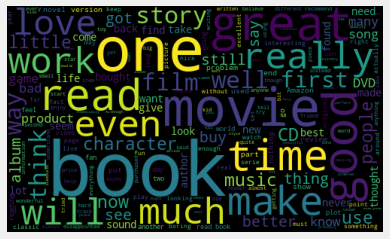

In [8]:
#plot The Word Cloud
allword=' '.join([reviews for reviews in df.review])
wordcloud=WordCloud(width=500,height=300,random_state=21,max_font_size=100).generate(allword)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()


In [9]:
#create a function to compute the negative,neutral and positive analysis
def Analysis(score):
  if score<0:
    return 'Negative'
  elif score==0:
    return 'Neutral'
  else:
    return 'Positive'

df['analysis']=df['polarity'].apply(Analysis)

In [10]:
#show dataframe
df

,review,subjectivity,polarity,analysis
0,Stuning even for the non-gamer: This sound tra...,0.550000,-0.021875,Negative
1,The best soundtrack ever to anything.: I'm rea...,0.517460,0.261111,Positive
2,Amazing!: This soundtrack is my favorite music...,0.545988,0.274691,Positive
3,Excellent Soundtrack: I truly like this soundt...,0.463636,0.272727,Positive
4,"Remember, Pull Your Jaw Off The Floor After He...",0.520317,0.324802,Positive
...,...,...,...,...
9995,A revelation of life in small town America in ...,0.414583,0.216146,Positive
9996,Great biography of a very interesting journali...,0.494872,0.282051,Positive
9997,Interesting Subject; Poor Presentation: You'd ...,0.484524,-0.019048,Negative
9998,Don't buy: The box looked used and it is obvio...,0.454545,-0.085227,Negative


In [11]:
#print all positive review
print('Printing positive review:\n')
j=1
sortedDF = df.sort_values(by=['polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['analysis'][i] == 'Positive'):
    print(sortedDF['review'][i])
    print()
    j= j+1

Streaming output truncated to the last 5000 lines.
I've been had!: This is the only thing my son wanted for Christmas. I was hesitant because I thought it was a bit pricy. But I didn't want to disappoint my son so I bought it. True, the look on his face was worth the money the toy was not. It took a really long time to put the thing together and it has to lean up against a wall to stand. When he uses any of the supposedly "cool" features another piece falls off. My son has a long attention span and can play with a toy for a half an hour before moving on to something else. This toy frustrates him after just a few minutes.

Batcave a good buy!: My boys got this for their birthday and I put it together the night before. It is quite large and impressive and my boys' friends found it their most impressive present. One friend thought it was the neatest toy he had ever seen. My sons actaually spent more time playing with their Justice League Watch Tower but this toy was next most popular. The

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [12]:
# Printing negative tweets  
print('Printing negative review:\n')

sortedDF = df.sort_values(by=['polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['analysis'][i] == 'Negative'):
    print(sortedDF['review'][i])
    print()


Printing negative review:

Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^

The Worst!: A complete waste of time. Typographical errors, poor grammar, and a totally pathetic plot add up to absolutely nothing. I'm embarrassed for this author and very disappointed I actually paid for this book.

Awful beyond belief!: I feel I have to write to keep others from wasting their money. This book seems to have been written by a 7th grader with poor grammatical skills for her age! As another reviewer points out, there is a misspelling on the cover, and I believe there is at least one per chapter. For example, it was mentione

In [13]:
#printing analysis
print(df['analysis'].value_counts())

Positive    7410
Negative    2429
Neutral      161
Name: analysis, dtype: int64


In [14]:
#print percentage of positive review 
p_review=df[df['analysis']=='Positive']
p_review=p_review['review']
p_review_per=round(p_review.shape[0]/df.shape[0]*100,2)
print(p_review_per)

74.1


In [15]:
#print percentage of Negative review 
p_review=df[df['analysis']=='Negative']
p_review=p_review['review']
p_review_per=round(p_review.shape[0]/df.shape[0]*100,2)
print(p_review_per)

24.29


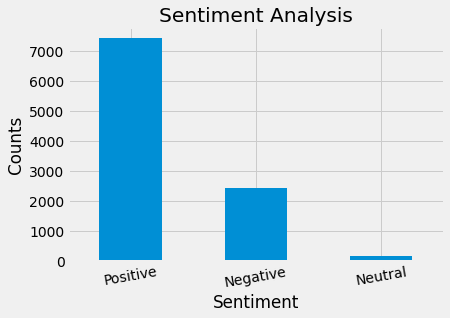

In [16]:
# Plotting and visualizing the counts
df['analysis'].value_counts().plot(kind = 'bar')

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.xticks(rotation=370)
plt.ylabel('Counts')

plt.show()
